In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
plt.style.use("/Users/tjwilli/presentation.mplstyle")

In [2]:
#Time step
dt = 0.001
#Time range
t = np.arange(0,3,dt)
#V (no air resistance)
v = np.zeros(t.size)
#V (with air resistance)
v2 = np.zeros(t.size)

#Initial conditions
v[0] = 0.01
v2[0] = 0.01

for i in range(1,t.size):
    #Euler steps
    v[i] = v[i-1] + dt/v[i-1]
    v2[i] = v2[i-1] + dt/v2[i-1] - v2[i-1]**2*dt

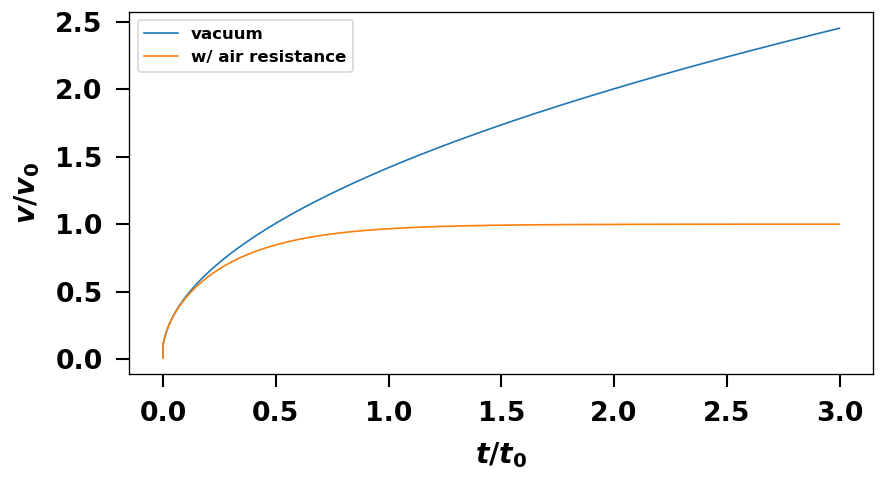

In [4]:
plt.figure(figsize=(8,4))
plt.plot(t,v,label='vacuum')
plt.plot(t,v2,label='w/ air resistance')

plt.xlabel(r'$t/t_0$')
plt.ylabel(r'$v/v_0$')
plt.legend();

# $\frac{dv}{dt}=a\frac{1}{v}-bv^2$ 

# $a=\frac{P}{m}$; $b=\frac{C\rho_{air}A}{2m}$

## $v_0=\left(\frac{a}{b}\right)^\frac{1}{3}=\left(\frac{2P}{C\rho_{air}A}\right)^\frac{1}{3}$
## $t_0=\left(ab^2\right)^{-\frac{1}{3}} =\left(\frac{4m^3}{PC^2\rho_{air}^2A^2}\right)^\frac{1}{3}$

In [ ]:
A = 0.33 #meters^2
m = 70.0 #kg
P = 400.0 #Watts
rho = 1.2 #kg/m3
C = 1

v0 = ( 2 * P / (C*rho*A) )**(1/3)
t0 = ( 4*m**3 / (P*C**2*rho**2*A**2))**(1/3)
print("For reasonable numbers for a pro cyclist:")
print( "\tTerminal velocity = {:.1f} m/s ({:.1f} mph)".format(v0,v0*2.23694) )
print( "\tTime scale = {:.1f} s".format(t0))
print( "\tLength scale = {:.1f} m".format(v0*t0))

In [ ]:
#Time step
dt = 0.001
#Time range
t = np.arange(0,3,dt)
#V (no air resistance)
v = np.zeros(t.size)
#V (with air resistance)
v2 = np.zeros(t.size)

#position (no resistance)
x = np.zeros(t.size)
#position (air resistance)
x2 = np.zeros(t.size)
#Initial conditions
v[0] = 0.01
v2[0] = 0.01
x[0] = 0
x2[0] = 0

for i in range(1,t.size):
    #Euler steps
    v[i] = v[i-1] + dt/v[i-1]                    #velocity (No air resistance)
    v2[i] = v2[i-1] + dt/v2[i-1] - v2[i-1]**2*dt #(With air resistance)
    x[i] = x[i-1] + v[i-1] * dt                  #position (No air resistance)
    x2[i] = x2[i-1] + v2[i-1] * dt               #(With air resistance)

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(t,x,label='vacuum')
plt.plot(t,x2,label='w/ air resistance')

mid=int(t.size/2)
plt.text(t[mid]*.5,x[mid]*1.5,r'$v(t)\sim t^\frac{1}{2}\Rightarrow x(t)\sim t^\frac{3}{2}$',c='C0',fontsize=15)
plt.text(t[mid]*.5,x2[mid]*.2,r'$v(t)\sim v_0\Rightarrow x(t)\sim v_0t$',c='C1',fontsize=15)
plt.xlabel(r'$t/t_0$')
plt.ylabel(r'$\frac{x}{v_0t_0}$')
plt.legend()

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
im = OffsetImage(image,zoom=.2)
fig = plt.figure(figsize=(12,8))
ax = plt.axes(xlim=(0,10*x.max()),ylim=(0,1))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
scat1 = plt.scatter([],[],marker='|',color='blue',s=100)
scat2 = plt.scatter([],[],marker='|',color='green',s=100)
def animate(i):
    ix = x[i]
    ab = AnnotationBbox(im,(ix*10,0.75),xycoords='data',frameon=False)
    ab2 = AnnotationBbox(im,(x2[i]*10,0.25),xycoords='data',frameon=False)
    ax.artists = []
    ax.add_artist(ab)
    ax.add_artist(ab2)
    div = 10
    if i%div==0:
        xtemp = x[:i:div]
        #plt.scatter( xtemp*10,[0.5 for xx in xtemp])
        scat1.set_offsets( np.array([xtemp*10,[0.75 for xx in xtemp]]).T )
        xtemp = x2[:i:div]
        scat2.set_offsets( np.array([xtemp*10,[0.25 for xx in xtemp]]).T )
    return ab,ab2,scat1,scat2

anim = FuncAnimation(fig, animate,
                               frames=x.size, interval=5, blit=True)
#HTML( anim.to_html5_video() )
anim.save("bike.mp4")

In [ ]:
from IPython.display import Video

In [ ]:
!open bike.mp4

In [ ]:
Video("bike.mp4")